In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score


In [2]:
data = pd.read_csv('Jupyter workspace/sparks internship/project/house_prices.csv')
data.head()

Transaction  House age  Distance to MRT station  \
0     2012.917       32.0                 84.87882   
1     2012.917       19.5                306.59470   
2     2013.583       13.3                561.98450   
3     2013.500       13.3                561.98450   
4     2012.833        5.0                390.56840   

   Number of convenience stores  Latitude  Longitude  House unit price  
0                            10  24.98298  121.54024              37.9  
1                             9  24.98034  121.53951              42.2  
2                             5  24.98746  121.54391              47.3  
3                             5  24.98746  121.54391              54.8  
4                             5  24.97937  121.54245              43.1

In [3]:
data['Class'] = pd.cut(data['House unit price'], bins=15)
data['Class id'] = data['Class'].cat.codes
data.head()

Transaction  House age  Distance to MRT station  \
0     2012.917       32.0                 84.87882   
1     2012.917       19.5                306.59470   
2     2013.583       13.3                561.98450   
3     2013.500       13.3                561.98450   
4     2012.833        5.0                390.56840   

   Number of convenience stores  Latitude  Longitude  House unit price  \
0                            10  24.98298  121.54024              37.9   
1                             9  24.98034  121.53951              42.2   
2                             5  24.98746  121.54391              47.3   
3                             5  24.98746  121.54391              54.8   
4                             5  24.97937  121.54245              43.1   

              Class  Class id  
0  (36.907, 44.233]         4  
1  (36.907, 44.233]         4  
2   (44.233, 51.56]         5  
3   (51.56, 58.887]         6  
4  (36.907, 44.233]         4

In [4]:
X = data
y = data['Class id']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

In [6]:
model = KNeighborsClassifier()
model.fit(X_train[['Latitude', 'Longitude']], y_train)
y_pred = model.predict(X_test[['Latitude', 'Longitude']])
accuracy_score(y_test, y_pred)

0.42857142857142855

In [14]:
df_pred = pd.DataFrame(y_pred, columns=['Pred cat'])
df_pred['Pred'] = df_pred['Pred cat'].apply(lambda x: X_test['Class'].cat.categories[x].mid)
df_pred.head()

Pred cat     Pred
0         5  47.8965
1         4  40.5700
2         4  40.5700
3         3  33.2435
4         2  25.9165

In [8]:
r2_score(X_test['House unit price'], df_pred['Pred'])

0.6935774017709413

In [12]:
import matplotlib.pyplot as plt  
%matplotlib inline

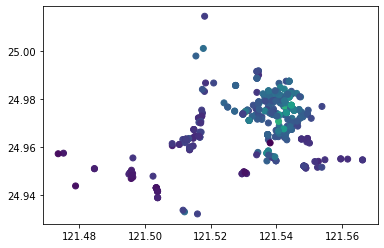

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=X['Longitude'], y=X['Latitude'], c=data['House unit price'])